In [1]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\elecproduction.csv", parse_dates=['DATE'])
df.columns = ['Date', 'Electricity']
df = df.sort_values('Date').set_index('Date').asfreq('MS').interpolate()
df.head()

,Electricity
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [3]:
test_size = 24
train, test = df.iloc[:-test_size], df.iloc[-test_size:]

In [4]:
model = ExponentialSmoothing(train['Electricity'],
                            trend='add',
                            seasonal='add',
                            seasonal_periods=12,
                            damped_trend=True)
results = model.fit(optimized=True, use_brute=True)

In [5]:
forecast = results.forecast(steps=len(test))

In [6]:
future = results.forecast(steps = 60)

In [7]:
future_date = pd.date_range(start=df.index[-1], periods = 60 + 1, freq="MS")[1:]

In [10]:
print(future.head())

2016-02-01    107.030806
2016-03-01     97.438268
2016-04-01     85.629845
2016-05-01     88.564111
2016-06-01    100.032363
Freq: MS, dtype: float64


In [12]:
mae = mean_absolute_error(test['Electricity'], forecast)
rmse = np.sqrt(mean_squared_error(test['Electricity'], forecast))
mape = np.mean(np.abs((test['Electricity'] - forecast)/test['Electricity']) * 100)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

MAE: 3.70, RMSE: 4.76, MAPE: 3.49%


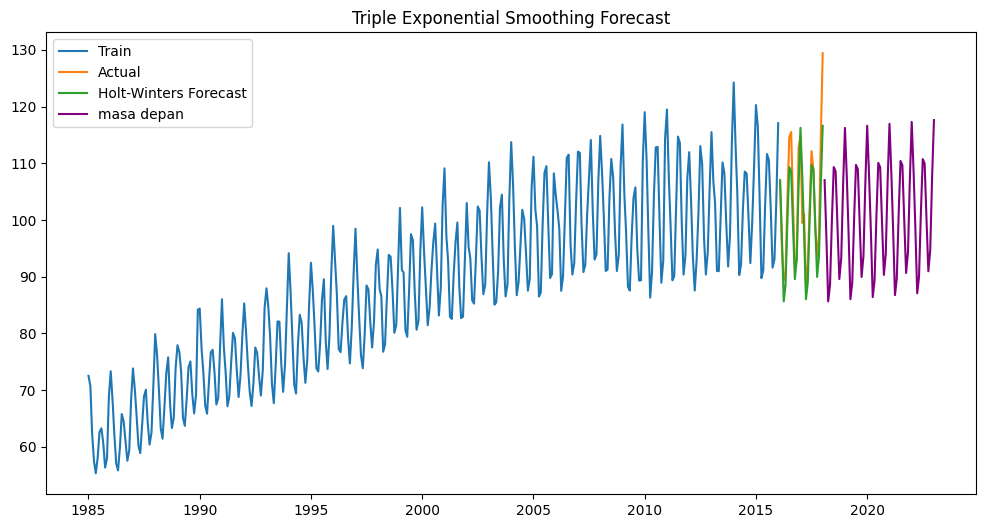

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Electricity'], label='Train')
plt.plot(test.index, test['Electricity'], label='Actual')
plt.plot(test.index, forecast, label='Holt-Winters Forecast')
plt.plot(future_date, future, label='masa depan', color='purple')

plt.title('Triple Exponential Smoothing Forecast')
plt.legend()
plt.show()

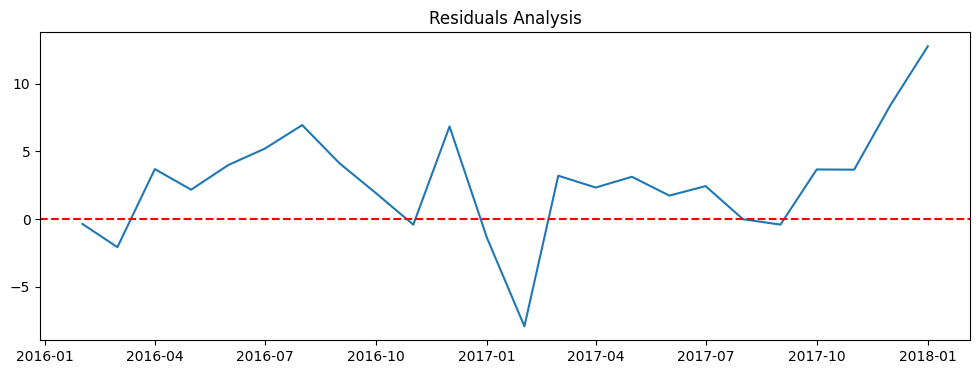

In [15]:
residuals = test['Electricity'] - forecast
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title('Residuals Analysis')
plt.axhline(0, color='red', linestyle='--')
plt.show()